In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [2]:
#DATA LOADING
#ld.size
ld = pd.read_csv (r'hotel_bookings.csv')
ld.head(2999)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2995,Resort Hotel,1,42,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,47.7,0,0,Canceled,2015-10-16
2996,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2997,Resort Hotel,0,36,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,73.2,1,0,Check-Out,2015-11-15


In [3]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#DATA CLEANING
# Checking for NaN values
ld.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# We see that country, agent, company, babies columns have NaN values
# these we want to either remove or fix, so that we won't get 
# inaccurate results based on these

In [6]:
# Check country data
ld['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [7]:
#List of occurences of each country
country = ld['country']
country = pd.DataFrame(country.value_counts())
print(country)

     country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
..       ...
NCL        1
MLI        1
SMR        1
NPL        1
CYM        1

[177 rows x 1 columns]


In [8]:
# Here we see single NaN value we have in the dataset
ld[ld['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [9]:
# to clean this up, we will try estimate a guess for this value
# We will compare the value of lead_time = 118 and see which country 
# would have the highest change of fitting the country that haven't been entered.
ld[ld['lead_time'] == 118]['country'].value_counts()

PRT    59
GBR    34
FRA    24
DEU    20
ESP    17
BEL    14
ITA    12
SWE    10
TUR     9
IRL     9
RUS     8
POL     8
NOR     7
NLD     7
ISR     5
CHE     5
BRA     4
HUN     4
AUT     3
SVN     3
CHN     3
CN      3
USA     3
BGR     3
DNK     2
FIN     2
ZAF     2
AUS     2
MAR     1
ROU     1
CZE     1
SVK     1
HRV     1
LTU     1
AGO     1
ARE     1
Name: country, dtype: int64

In [10]:
# Here we see that PRT is the most likely country to fit this NaN
# therefore we will fill the NaN with PRT
ld['country'] = ld['country'].fillna('PRT')

# now we shouldn't have any NaN values in the country column anymore
ld['country'].isnull().sum()

0

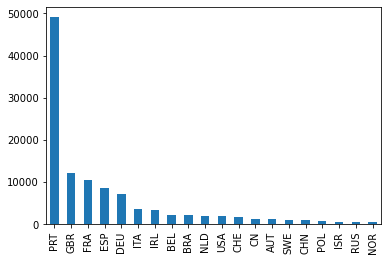

In [11]:
# plot country results
ld['country'].value_counts()[:20].plot(kind='bar')

In [12]:
# Now we will clean the company column
ld['company'].describe()

count    6797.000000
mean      189.266735
std       131.655015
min         6.000000
25%        62.000000
50%       179.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64

In [13]:
ld['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

In [14]:
# We know there is 3000 entries in the dataset and the company column
# contains 2876 NaN values. This is most of the entries
print(2876/3000 * 100, "% NaN values in 'company'")

95.86666666666666 % NaN values in 'company'


In [15]:
# Givin that 96% of the Values in the company column is NaN 
# instead of modifying the data is might be better to just remove
# the column itself, which we will
ld = ld.drop(['company'], axis=1)

In [16]:
ld.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [17]:
# Now we only have the agent column left with NaN values
# and will try to analyse what we can do with this
ld['agent'].describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [18]:
ld['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [19]:
ld[ld['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,0,No Deposit,NaN,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,0,No Deposit,NaN,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,0,No Deposit,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [20]:
# The agent column feature as an ID of the traveling agency that made
# the booking. We first thought about just removing this column also
# from the dataset, but thinking straight we can just keep these data, 
# as the booking made from no agency, directly at the hotels.
# But since we don't wan't any NaN values in our dataset, we will simply
# fill all the NaN values with 0.
ld['agent'] = ld['agent'].fillna('0')
ld['agent'].isnull().sum()

0

In [21]:
# Now we finished cleaning our dataset and it is now ready for use
ld.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [22]:
ld.shape

(119390, 31)

In [23]:
ld = ld.dropna()

In [24]:
ld.shape

(119386, 31)

In [25]:
ld.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [26]:
#
# Section 2
# Data analysis
#
#

In [27]:
# Try to find prediction of amount of people arriving at hotels each month 
correlation = ld.corr()["arrival_date_week_number"]
correlation.abs().sort_values(ascending=False)[1:]

arrival_date_year                 0.540566
lead_time                         0.126885
adr                               0.075811
arrival_date_day_of_month         0.066824
previous_cancellations            0.035502
is_repeated_guest                 0.030129
total_of_special_requests         0.026139
adults                            0.025901
days_in_waiting_list              0.022935
previous_bookings_not_canceled    0.020902
stays_in_weekend_nights           0.018209
stays_in_week_nights              0.015559
babies                            0.010397
is_canceled                       0.008132
children                          0.005518
booking_changes                   0.005512
required_car_parking_spaces       0.001924
Name: arrival_date_week_number, dtype: float64

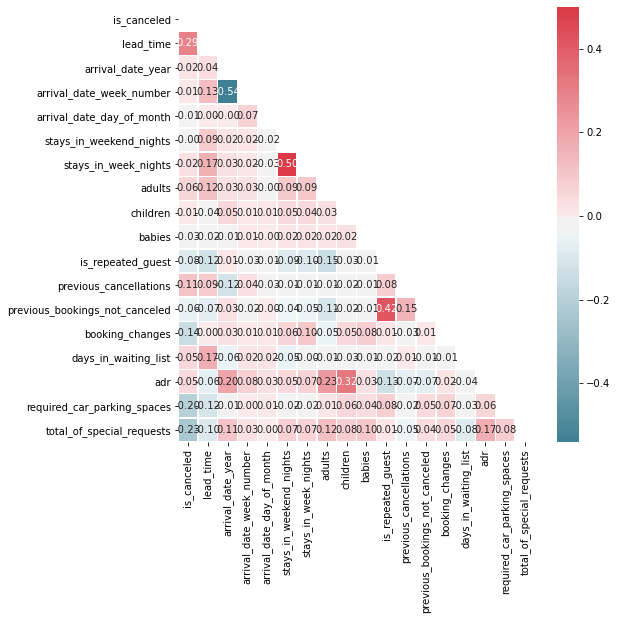

In [28]:
corr = ld.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [29]:
# from this graph we see that the targeted 'arrival_date_week_numbers' 
# 'adr', 'children', 'adult', 'babies', 'total_of_specail_requests'

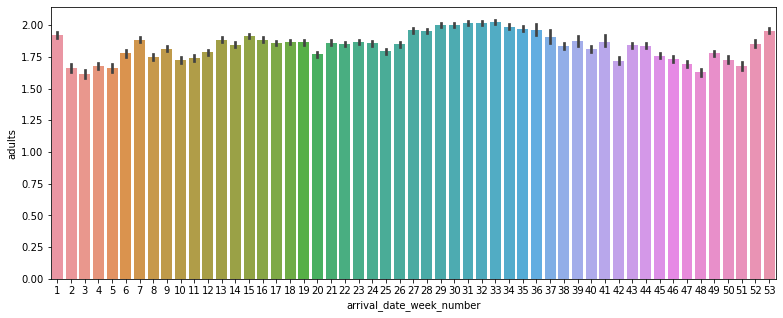

In [30]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'adults', data = ld)

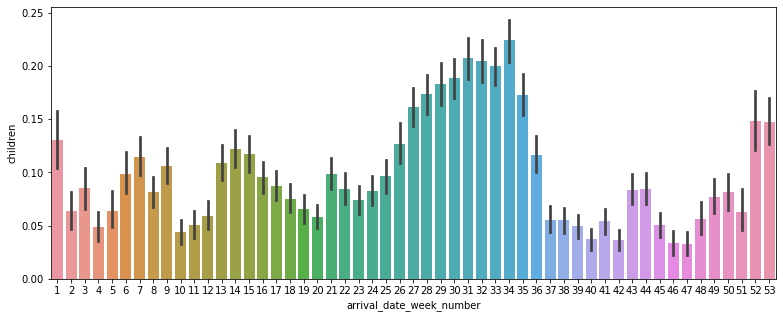

In [31]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'children', data = ld)

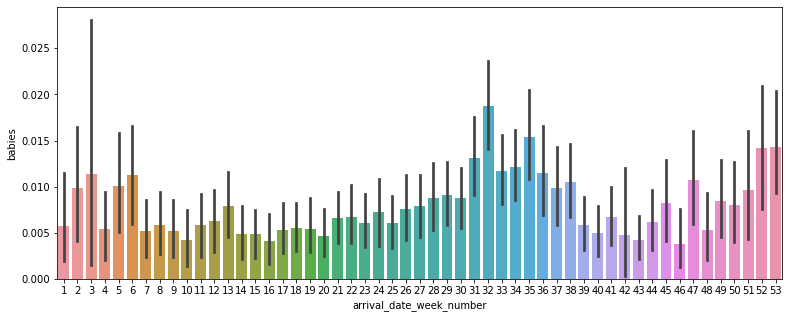

In [32]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'babies', data = ld)

In [33]:
# sum of all people each month
sum_column = ld["adults"] + ld["children"] + ld['babies']
ld["total_people"] = sum_column

print(ld['total_people'])

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_people, Length: 119386, dtype: float64


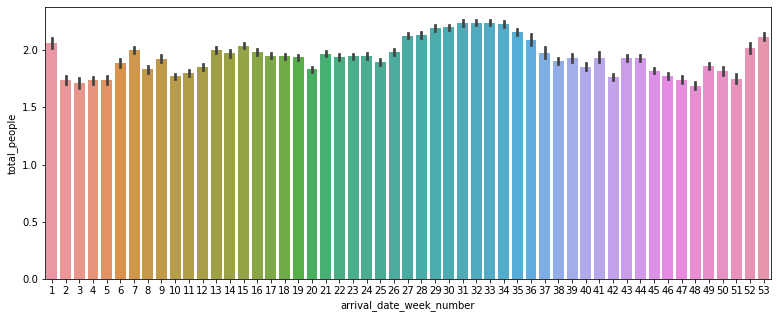

In [34]:
# graph of total people each month
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'total_people', data = ld)

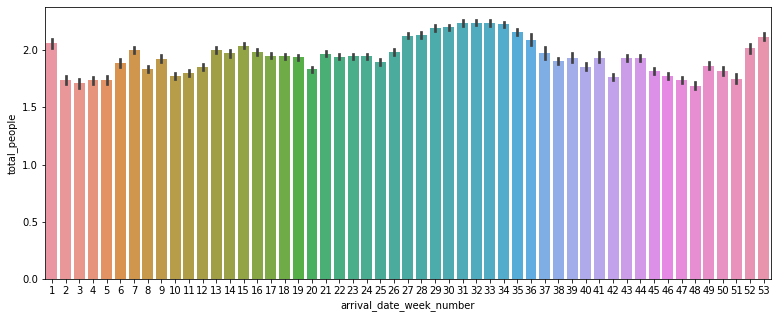

In [35]:
# graph of total people each month
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'total_people', data = ld)

In [36]:
ppw = pd.DataFrame(columns = ['week', 'avg_people'])
ppw['week'] = ld['arrival_date_week_number']
ppw['avg_people'] = ld['total_people']
ppw.groupby('week', as_index=True)['avg_people'].mean()

week
1     2.059217
2     1.738095
3     1.709629
4     1.735709
5     1.739005
6     1.889920
7     2.004267
8     1.833484
9     1.925838
10    1.771056
11    1.799034
12    1.850216
13    2.002070
14    1.972615
15    2.040164
16    1.983368
17    1.951872
18    1.946343
19    1.935887
20    1.831957
21    1.967414
22    1.941477
23    1.945822
24    1.947958
25    1.898235
26    1.983271
27    2.127628
28    2.134946
29    2.192906
30    2.197927
31    2.236775
32    2.238001
33    2.238614
34    2.225987
35    2.159275
36    2.087217
37    1.970839
38    1.904547
39    1.927547
40    1.853150
41    1.931086
42    1.762700
43    1.929422
44    1.929137
45    1.819681
46    1.773189
47    1.740059
48    1.689495
49    1.863636
50    1.817276
51    1.751340
52    2.017573
53    2.117841
Name: avg_people, dtype: float64

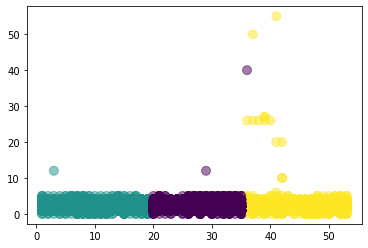

In [37]:
test1 = pd.DataFrame(columns = ['arrival_date_week_number', 'total_people'])
test1['arrival_date_week_number'] = ld['arrival_date_week_number']
test1['total_people'] = ld['total_people']

kmeans = KMeans(n_clusters=3).fit(test1)

plt.scatter(test1['arrival_date_week_number'], test1['total_people'], c= kmeans.labels_.astype(float), s=80, alpha=0.5)
plt.show()

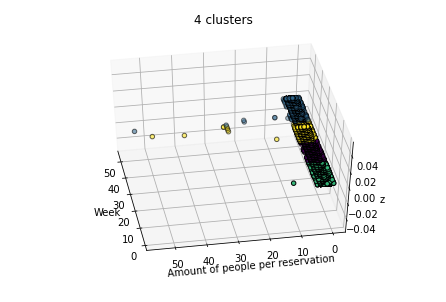

In [38]:
estimators = [('k_means', KMeans(n_clusters=4))]
fignum = 1
titles = ['4 clusters']
for name, est in estimators:
    fig = plt.figure()
    ax = Axes3D(fig, elev=48, azim=170)
    est.fit(test1)
    labels = est.labels_

    ax.scatter(test1['arrival_date_week_number'],test1['total_people'],
               c=labels.astype(np.float), edgecolor='k')


    ax.set_xlabel('Week')
    ax.set_ylabel('Amount of people per reservation')
    ax.set_zlabel('z')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [39]:
# data prediction
# splitting dataset
ld_new = ld.copy()[['arrival_date_year', 'lead_time', 'adr', 'arrival_date_day_of_month', 'previous_cancellations', 'arrival_date_week_number']]
ld_new.head()

,arrival_date_year,lead_time,adr,arrival_date_day_of_month,previous_cancellations,arrival_date_week_number
0,2015,342,0.0,1,0,27
1,2015,737,0.0,1,0,27
2,2015,7,75.0,1,0,27
3,2015,13,75.0,1,0,27
4,2015,14,98.0,1,0,27


In [40]:
x = ld_new.drop(['arrival_date_week_number'], axis=1)
y = ld_new['arrival_date_week_number']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [42]:
model_LogReg_Asli = LogisticRegression()
model_LogReg_Asli.fit(x_train, y_train)
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

m = model_LogReg_Asli.coef_[0][0]
c = model_LogReg_Asli.intercept_[0]

[[ 6.51520147e-04 -2.48770109e-03 -1.65504449e-02 -2.28295624e-02
  -9.31053541e-05]
 [ 1.30338040e-03 -2.53063405e-03 -3.27392067e-02 -1.51010362e-02
   1.22521173e-05]
 [ 1.30848518e-03 -3.02719534e-03 -3.52562974e-02  8.10404150e-04
   2.46172413e-04]
 [ 1.04373075e-03 -1.65104762e-03 -3.10739402e-02  2.16549746e-02
   8.70073763e-05]
 [ 1.19972281e-03 -1.79979219e-03 -3.40136726e-02  1.02495015e-02
   1.18647157e-04]
 [ 1.37496427e-03 -1.86291412e-03 -2.94934125e-02 -2.64440444e-02
  -1.19771529e-04]
 [ 1.29483151e-03 -5.39114874e-03 -2.12114687e-02 -1.26888580e-02
  -1.26154159e-04]
 [ 1.13556394e-03 -7.39291329e-03 -2.12648046e-02  1.68626068e-02
   2.40467177e-04]
 [ 1.08767573e-03 -4.93575992e-03 -2.15862050e-02  1.29969199e-02
   1.19941227e-04]
 [ 1.50775801e-03 -7.29373782e-03 -2.35620969e-02 -2.51756299e-02
  -2.66424032e-04]
 [ 1.34877059e-03 -7.57966096e-03 -2.13278765e-02 -1.53754253e-02
  -3.18397813e-04]
 [ 1.07075412e-03 -5.79236070e-03 -2.03394975e-02  1.11386555e-02

In [43]:
model_LogReg_Asli.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [45]:
from sklearn.model_selection import RandomizedSearchCV
model_LR = LogisticRegression()
model_LR_RS = RandomizedSearchCV(
    estimator = model_LR, param_distributions= param, cv = 5
)